Math's being my first area of study, I'd like to know how people are using Wikipedia and how it is structured.

Namely:
- What structure do the hyperlinks between webpages form?
- What are the most searched pages to what area do they correspond to?
- What pages are usually searched together?

# Importing

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

# For graph and clustering
import networkx as nx
from scipy.cluster import hierarchy
import community

In [2]:
# Open the JSON file for reading
with open('wikivital_mathematics.json', 'r') as json_file:
    data_json = json.load(json_file)

# Data Inspection

In [3]:
data_json.keys()

dict_keys(['edges', 'weights', 'node_ids', 'time_periods', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '

After an initial analysis, the keys represent the following:
- node_ids | Names of webpages
- edges | Edges between webpages representing hyperlinks
- weights | Weights?
- time_periods | Number of time periods
- 0, 1, ..., 730 | Contains the corresponding time period date and a list with the corresponding visits on that day ordered by node id


In [4]:
# Save the edges with the corresponding weights
# Format: [node1, node2, weight]
edges = [nodes + [weight] for nodes, weight in zip(data_json['edges'], data_json['weights'])]

# Save the nodes ids
node_ids = pd.DataFrame.from_dict(data_json['node_ids'], orient = 'index').sort_values(by = 0)

# Useful variables
N_IDS = len(list(data_json['node_ids'].values())) # Number of nodes
N_TIME = data_json['time_periods'] # Number of time stamps
MAX_TIME_str = str(N_TIME - 1) # String of maximum time stamp

Let's create a dataframe for easy management. Index will be time stamps.

In [5]:
start_date = str(data_json['0']['day']) + '-' + str(data_json['0']['month']) + '-' + str(data_json['0']['year'])
end_date = str(data_json[MAX_TIME_str]['day']) + '-' + str(data_json[MAX_TIME_str]['month']) + '-' + str(data_json[MAX_TIME_str]['year'])
print('Start date: ' + start_date, 'End date: ' + end_date, sep='\n')
freq = 'D'

# Time stamps
dates = pd.date_range(start=start_date, end=end_date, freq=freq)
print(dates)

Start date: 16-3-2019
End date: 15-3-2021
DatetimeIndex(['2019-03-16', '2019-03-17', '2019-03-18', '2019-03-19',
               '2019-03-20', '2019-03-21', '2019-03-22', '2019-03-23',
               '2019-03-24', '2019-03-25',
               ...
               '2021-03-06', '2021-03-07', '2021-03-08', '2021-03-09',
               '2021-03-10', '2021-03-11', '2021-03-12', '2021-03-13',
               '2021-03-14', '2021-03-15'],
              dtype='datetime64[ns]', length=731, freq='D')


In [6]:
# We first create a dictionary where the columns are the time stamps and the rows are the ids
dataframe_dict = {}
for i in range(N_TIME):
    dataframe_dict[dates[i]] = data_json[str(i)]['y']

data = pd.DataFrame(dataframe_dict, index = node_ids.index)

# We transpose the dataframe so that the columns are the ids and the rows are the time stamps
data = data.T
data.head()

,Mathematics,Number theory,Algebra,Geometry,Calculus,Mathematical analysis,Conjecture,Mathematical proof,Counting,Shape,...,Component (graph theory),Minimum-cost flow problem,Stable roommates problem,Blossom algorithm,Tutte–Berge formula,Herschel graph,Tait's conjecture,Multibody system,Dynamic simulation,Cache replacement policies
2019-03-16,3962,774,1734,1016,2463,436,214,402,363,490,...,0,56,66,38,1,11,5,36,20,364
2019-03-17,3923,772,1884,1301,2365,497,163,470,342,508,...,18,74,60,53,5,7,10,37,26,334
2019-03-18,4617,827,2059,1251,2801,593,255,562,519,711,...,128,130,112,90,6,15,21,47,39,468
2019-03-19,4822,863,2041,1336,2935,530,279,576,474,842,...,132,129,101,78,9,6,14,73,39,487
2019-03-20,4871,906,2017,1379,2803,559,265,611,502,721,...,98,131,59,67,12,18,6,97,39,448


With a DataFrame like this, we can plot the daily visits to a webpage 

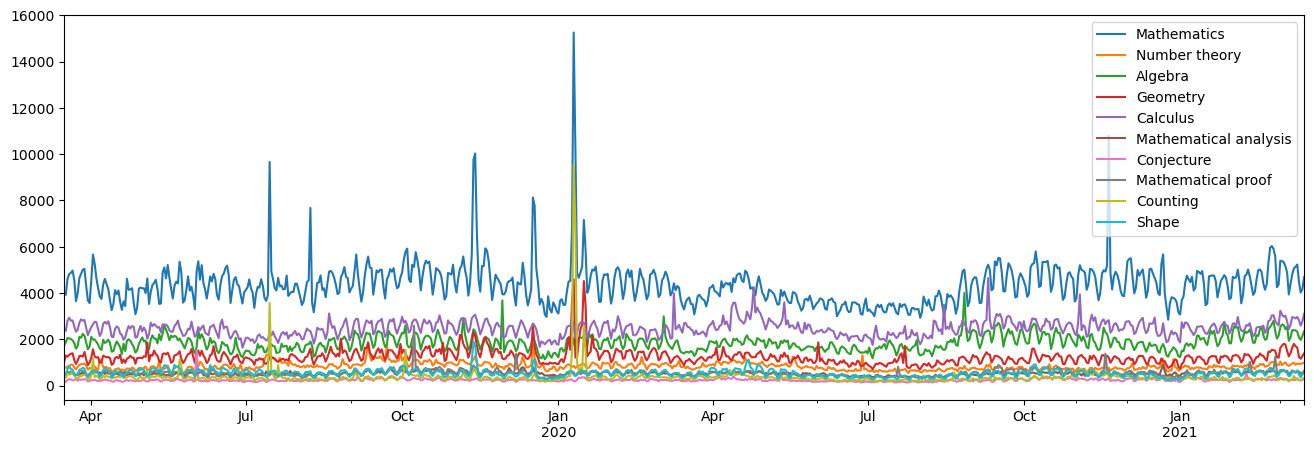

In [7]:
# Plot of the first 10 websites
for i in range(10):
    data.iloc[:,i].plot(figsize=(16, 5))

plt.legend()
plt.show()

# Data Analysis

### Wikipedia Structure - Network clustering

We can use Louvain's method to extract communities out of graphs. The Louvain Method is an algorithm that is used to find communities in a network, for example hidden groups of friends in a social network or communities in any complex network. It starts by guessing that everyone is in their own group and then cleverly groups them together to make the network look more organized. This method helps researchers and analysts uncover meaningful connections within large networks, making it a valuable tool for understanding how things are connected in the digital world.

In [8]:
import random
random.seed(42)
np.random.seed(42)

# Create graph
G = nx.DiGraph()

# Add the nodes and edges
G.add_weighted_edges_from(edges)

# Use Louvain's method to find communities
UG = G.to_undirected()
partition = community.best_partition(UG, weight='weight', resolution=4)

# Create a dictionary where keys are community IDs and values are lists of nodes in that community
communities = {}
for node, comm_id in partition.items():
    communities.setdefault(comm_id, []).append(node)

# Turn each node ID into the corresponding node name
for key in communities.keys():
    communities[key] = list(map(lambda x: node_ids.index[x], communities[key]))

Using a threshold/resolution of 4, we see (at least from a mathematician's point of view), a separation between areas of mathematics, for example:
- Lemmas, Theorems, ...
- Number theory
- Algebra
- Geometry
- Numerical constants
- Mathematical logic
- ...

and others...

In [9]:
communities

{0: ['Mathematics',
  'Conjecture',
  'Lemma (mathematics)',
  'Corollary',
  'Porism'],
 4: ['Number theory',
  "Fermat's Last Theorem",
  'Modulo operation',
  'Modular arithmetic',
  'Sieve of Eratosthenes',
  'Diophantine equation',
  'Greatest common divisor',
  'Euclidean algorithm',
  'Primality test',
  'Discrete logarithm',
  'Quadratic residue',
  'Chinese remainder theorem',
  'Kuṭṭaka',
  "Wilson's theorem",
  "Fermat's little theorem",
  'Quadratic reciprocity',
  'Long division',
  'Extended Euclidean algorithm',
  "Bézout's identity",
  'Coprime integers',
  'AKS primality test',
  "Euclid's theorem",
  'Legendre symbol',
  'Jacobi symbol',
  'RSA (cryptosystem)',
  'Deterministic algorithm',
  'Diffie–Hellman key exchange',
  'Reed–Solomon error correction'],
 2: ['Algebra',
  'Group theory',
  'Field (mathematics)',
  'Group (mathematics)',
  'Ring (mathematics)',
  'Abstract algebra',
  'Algebraic geometry',
  'Commutative algebra',
  'Harmonic analysis',
  'Algebraic

### Webpage frequency

We'll plot a histogram of the mean values for each website's visits. They seem to follow an inverse exponential.

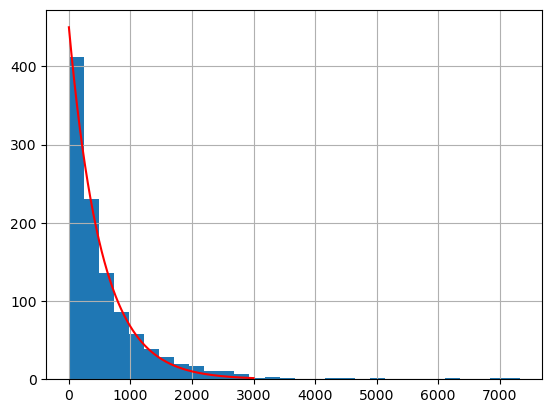

In [10]:
data_means = data.mean()

# Histogram
data_means.hist(bins = 30)

# Plot of an inverse exponential graph
x = np.linspace(0, 3000, 3000)
y = 450*np.exp(-0.0019*x)
plt.plot(x, y, color = 'red')

plt.show()

We can see what the top and least viewed pages are the following

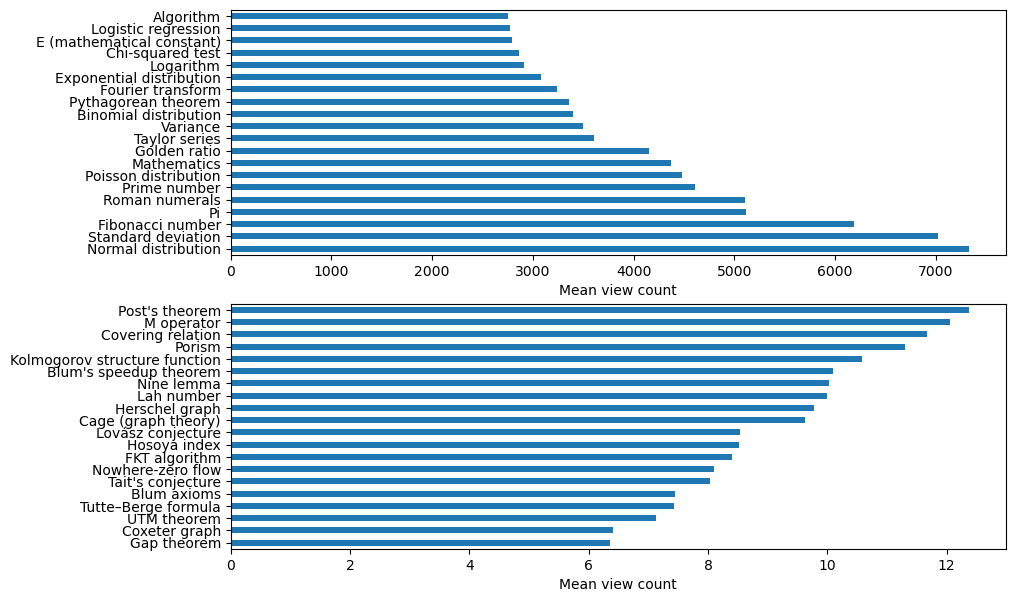

In [11]:
top_viewed = data_means.nlargest(20)
least_viewed = data_means.nsmallest(20)

# Barplot of top and least viewed
fig, ax = plt.subplots(2, 1, figsize=(10,7))

top_viewed.plot(kind='barh', ax=ax[0])
least_viewed.plot(kind='barh', ax=ax[1])

ax[0].set_xlabel('Mean view count')
ax[1].set_xlabel('Mean view count')
plt.show()

#### Most viewed
We can see in which communities each of these are according to our network clustering. We see that most aren't connected in the clustering, even though we can recognize some similiarities. For example, Pi, E, Golden ratio are all mathematical constants.

However, we can definitely see a major trend in probabilistic and statistical topics such as distributions, variance, standard deviation, chi-squared test and logistic regression. This makes sense since these are extensively used in areas outside pure maths, namely in computer science, data science and machine learning where statistics is a major part of the field and these concepts show up recurrently.

In general, these correspond to vague examples that either are simple concepts for which you don't need a lot of mathematical knowledge for, or to concepts that are used widely in many areas of mathematics or that are common to college courses.

#### Least viewed

For the least viewed pages, we see a variety of communities. However, two stand out, the first being related to graphs and the second one related with complexity theory. This is curious since these are two of the most applied areas of mathematics.

On the contrary, the least viewed pages are composed essentially of advanced topics which not a lot a people understand/know about, and the ones who do, probably prefer looking at research papers or technical books.


In [12]:
print('Most viewed grouped by community:')
# Loop communities
for i in communities.keys():
    new_community_Q = True
    # Print each topic in that community
    for topic in top_viewed.keys():
        if topic in communities[i]:
            # If it is a new community, print a new line
            if new_community_Q:
                print('\n', topic, end = '')
                new_community_Q = False
            else:
                print(',', topic, end =  '')

print('\n\nLeast viewed grouped by community:')
# Loop communities
for i in communities.keys():
    new_community_Q = True
    # Print each topic in that community
    for topic in least_viewed.keys():
        if topic in communities[i]:
            # If it is a new community, print a new line
            if new_community_Q:
                print('\n', topic, end = '')
                new_community_Q = False
            else:
                print(',', topic, end =  '')

Most viewed grouped by community:

 Mathematics
 Pythagorean theorem
 Normal distribution, Standard deviation, Poisson distribution, Variance, Binomial distribution, Exponential distribution, Chi-squared test, Logistic regression
 Fibonacci number, Roman numerals, Prime number
 Logarithm
 Pi
 Algorithm
 Taylor series
 E (mathematical constant)
 Golden ratio
 Fourier transform

Least viewed grouped by community:

 Porism
 Nine lemma
 Lah number
 Gap theorem, UTM theorem, Blum axioms, Blum's speedup theorem, Kolmogorov structure function, Μ operator, Post's theorem
 Covering relation
 Coxeter graph, Tutte–Berge formula, Tait's conjecture, Nowhere-zero flow, FKT algorithm, Hosoya index, Lovász conjecture, Cage (graph theory), Herschel graph

### Community comparison

Which communities are being searched the most?

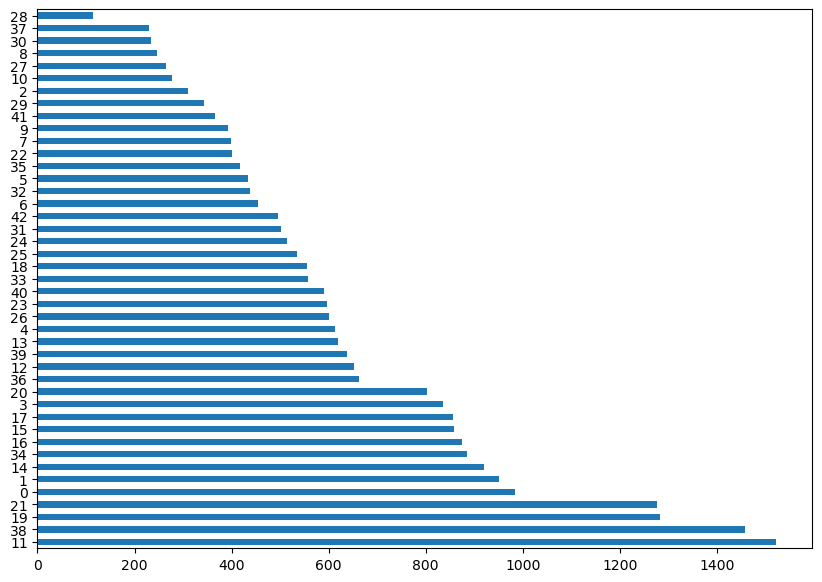

In [13]:
# New dictionary where keys are community IDs and values are the mean view count of each community
communities_mean = {}
for key in communities.keys():
    mean = data[communities[key]].mean(axis = 0).mean()
    communities_mean[key] = mean

# Create Series and plot the mean views by community
communities_mean = pd.Series(communities_mean).sort_values(ascending = False)
communities_mean.plot(kind='barh', figsize=(10,7))
plt.show()

We can see the 4 most and least viewed communities (The following table holds when considering both the mean and the median). Summarizing the communities into one topic, we see that:

| 4 most viewed communities | 4 least viewed communities |
| --- | --- | 
| Statistics | Category Theory |
| Complex analysis and functions | Graph Theory |
| Fourier Series | Order Theory |
| Trigonometry | Mathematical Logic |

Again, one surprising aspect is graph theory being on the least viewed communities since it has a wide range of applications. However, as expected statistics, trigonometry and complex analysis hold the top places as they're all widely used in engineering.

In [14]:
# Print communities with the highest and lowest mean view count
print('Most viewed communities:')
for keys in communities_mean.nlargest(4).keys().tolist():
    print('Community', keys, ':', communities[keys])

print('\nLeast viewed communities:')
for keys in communities_mean.nsmallest(4).keys().tolist():
    print('Community', keys, ':', communities[keys])

Most viewed communities:
Community 11 : ['Statistics', 'Design of experiments', 'Observational study', 'Statistical hypothesis testing', 'Fourier analysis', 'Arithmetic mean', 'Monte Carlo method', 'Gaussian function', 'Mean', 'Moment (mathematics)', 'Harmonic mean', 'Normal distribution', 'Standard deviation', 'Latin square', 'Geometric mean', 'Probability distribution', 'Random variable', "Bayes' theorem", 'Maximum likelihood estimation', 'Probability density function', 'Central limit theorem', 'Statistical population', 'Sampling (statistics)', 'Correlation and dependence', 'Regression analysis', 'Variance', 'Type I and type II errors', 'Confidence interval', 'Randomized controlled trial', 'Analysis of variance', 'Expected value', 'Linear regression', 'Ordinary least squares', 'Frequentist inference', 'Credible interval', 'Bayesian statistics', 'Statistical significance', 'P-value', 'Bayesian inference', 'Prior probability', 'Chi-squared test', "Student's t-test", 'Binomial distribut

### Seasonal trends

We can also see when are these webpages more searched. We see a clear trend where in the summer holidays (June - August) and winter holidays (December - January) we have a decrease in general Wikipedia math searches.

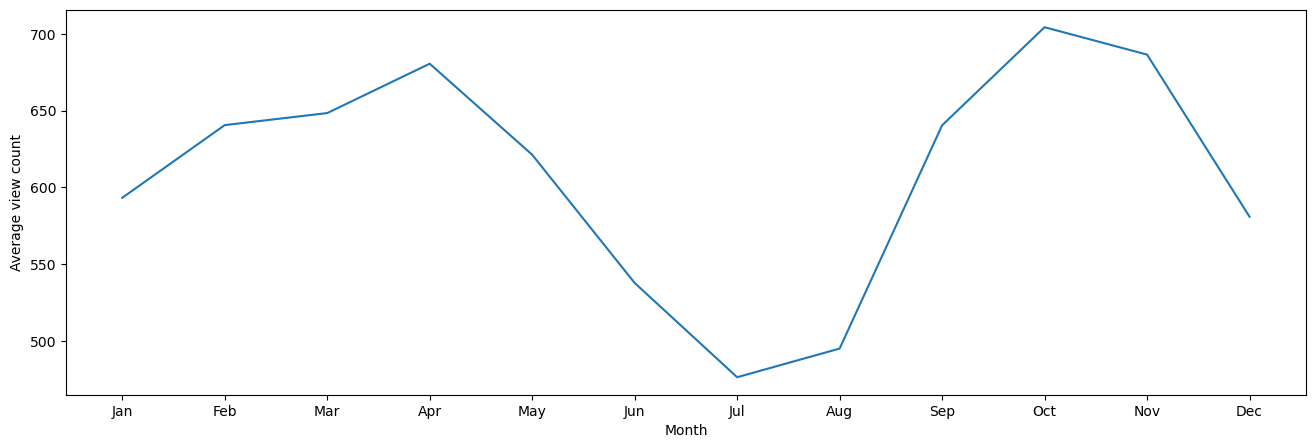

In [15]:
# Add month column
data['month'] = data.index.month
# Get the mean by month and plot
data.groupby('month').mean().mean(axis = 1).plot(figsize=(16, 5))
plt.xlabel('Month')
plt.ylabel('Average view count')
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec'])

plt.show()

What about weekday? As expected, we see a decrease when the weekend is ariving, attaining minimums on Saturday. It hits its highest values on the beggining of the week, with the maximum being on Tuesday.

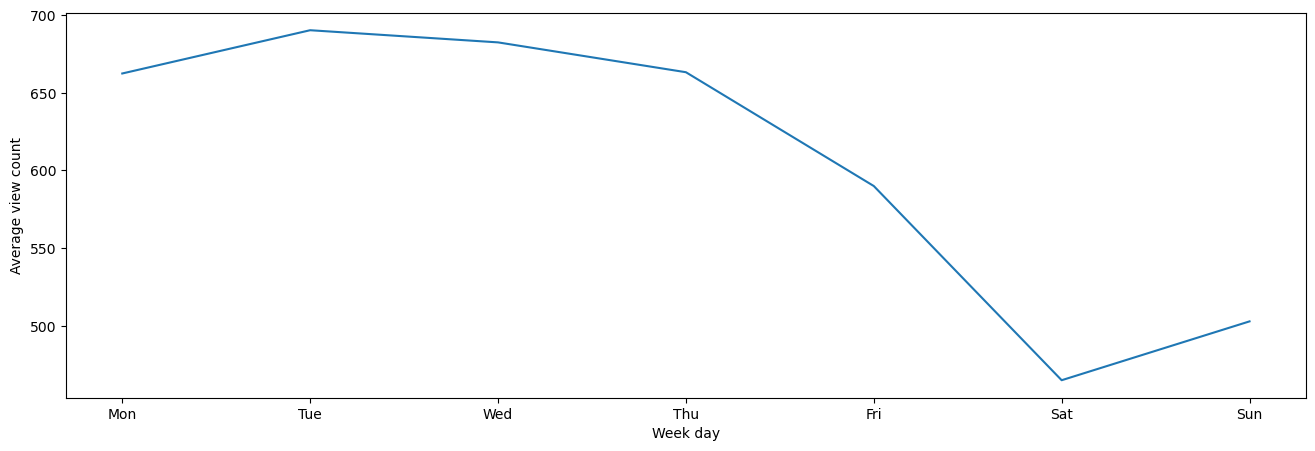

In [16]:
# Add week day column
data['week_day'] = data.index.weekday
# Get the mean by week day and plot
data.groupby('week_day').mean().mean(axis = 1).plot(figsize=(16, 5))
plt.xlabel('Week day')
plt.ylabel('Average view count')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.show()

### Which pages are searched together?

To see which pages are searched together, we'll first see how their views are correlated. Spearman correlation is great for this since it evaluates monotonic trends, meaning if two categories grow or descrease simultaneously and at which rate.

In [17]:
spearman_coefs = data.corr(method = 'spearman')

We'll know cluster the coefficients, and group the ones which have high correlation between them.

/var/folders/1z/j_4fdy254cs9grzc9c3yt13c0000gn/T/ipykernel_54640/378750968.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = hierarchy.linkage(distance_matrix, method='average')


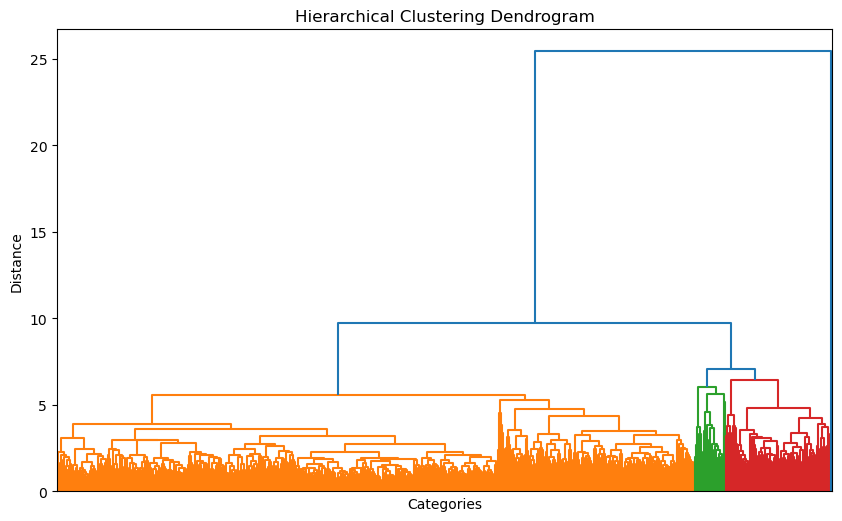

In [18]:
# Pass to distance matrix
distance_matrix = 1 - spearman_coefs

linkage_matrix = hierarchy.linkage(distance_matrix, method='average')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram = hierarchy.dendrogram(linkage_matrix, labels=data.columns, orientation='top', color_threshold=7)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Categories')
plt.ylabel('Distance')
plt.xticks([])
plt.show()

In [19]:
# Distance threshold cut-off
threshold = 3
# Get clusters
clusters = hierarchy.fcluster(linkage_matrix, threshold, criterion='distance')

N = 0
M = 20
# Print clusters N through M
for i in range(N, M + 1):
    # Get all the members of a cluster
    cluster_members = np.where(clusters == i)[0]
    cluster_members_name = list(map(lambda x: data.columns[x], cluster_members))

    print('Cluster {}: {}'.format(i, cluster_members_name))

Cluster 0: []
Cluster 1: ['Polynomial ring', 'Rhombus', 'Improper integral', 'Lebesgue integration', 'Numerical methods for ordinary differential equations', 'Multiplication sign', 'Inflection point', 'Inverse hyperbolic functions', 'Divide-and-conquer algorithm', 'Lattice (order)', 'Tuple', 'Discrete uniform distribution', 'Graph isomorphism', 'Context-free grammar', 'Cauchy–Riemann equations', 'Hasse diagram', 'Solenoidal vector field', 'Singularity (mathematics)', 'Binary search tree', 'Cache replacement policies']
Cluster 2: ['Fractal', 'Riemann zeta function', 'Chinese remainder theorem', 'Koch snowflake', 'Convergence tests', "Green's theorem", 'Multiple integral', 'Decision problem', 'Minimax', 'Repeated game', 'Strategy (game theory)', 'Residue theorem', 'Cardioid', 'Radius of convergence', 'Laurent series', 'Entire function', 'Fundamental group', 'Discrete logarithm', 'Field extension', 'NP (complexity)', "Liouville's theorem (complex analysis)", 'Graph coloring', 'Boolean sat

It is interesting how generally non-related topics seem to have strong connections. However it still seems to capture some relations, for example:
- Probability distribution, Probability density function, Expected value, Binomial distribution
- Second derivative, Differentiation rules, L'Hôpital's rule
- Decagon, Regular dodecahedron, Regular icosahedron

This is due to a common statistical fact: **Correlation does not imply causation**. Hence, even though two time series can be highly related, their searches may not be related at all.

### Stationary series

Using a Augmented Dickey-Fuller (ADF) test we can see if these series are stationary. A stationary time series is one whose statistical properties, such as mean, variance, and autocorrelation, do not change over time. In other words, a stationary time series has constant statistical properties throughout its entire duration, doesn't have a tendency to increase its mean or its amplitude of values.

For our purposes we will consider the p-values only and ignore the AFD statistic.

In [20]:
from statsmodels.tsa.stattools import adfuller

# List of non-stationary time series
non_stationary = []

# Loop through each column
for col in data.columns:
    # Skip month and week_day columns
    if col == 'month' or col == 'week_day':
        continue
    # Perform ADF test
    result = adfuller(data[col])
    p_value = result[1]

    # If p-value is less than 0.05, the time series is stationary
    if p_value < 0.05:
        continue
    else:
        non_stationary.append([col, p_value])

Let us print the 3 series with the largest p-value. The Pi variations can be explained simply because Pi day is on March 14th (3-14), so every year around that time, searches increase. However, the abnormalities on the others don't seem to have any explanation. 

Further analysis of the _Chi-square distribution_ wikipedia page edits don't show any relevant changes on the page on that time period. After further analysis, only 6 webpages seem to follow this pattern. Them being Hyperbolic functions, Division sign, Continuous uniform distribution, Feneral recursive function, Fraction, Chi-square distribution. They don't seem related. It appears to be a data collection error or an outside phenomenom.

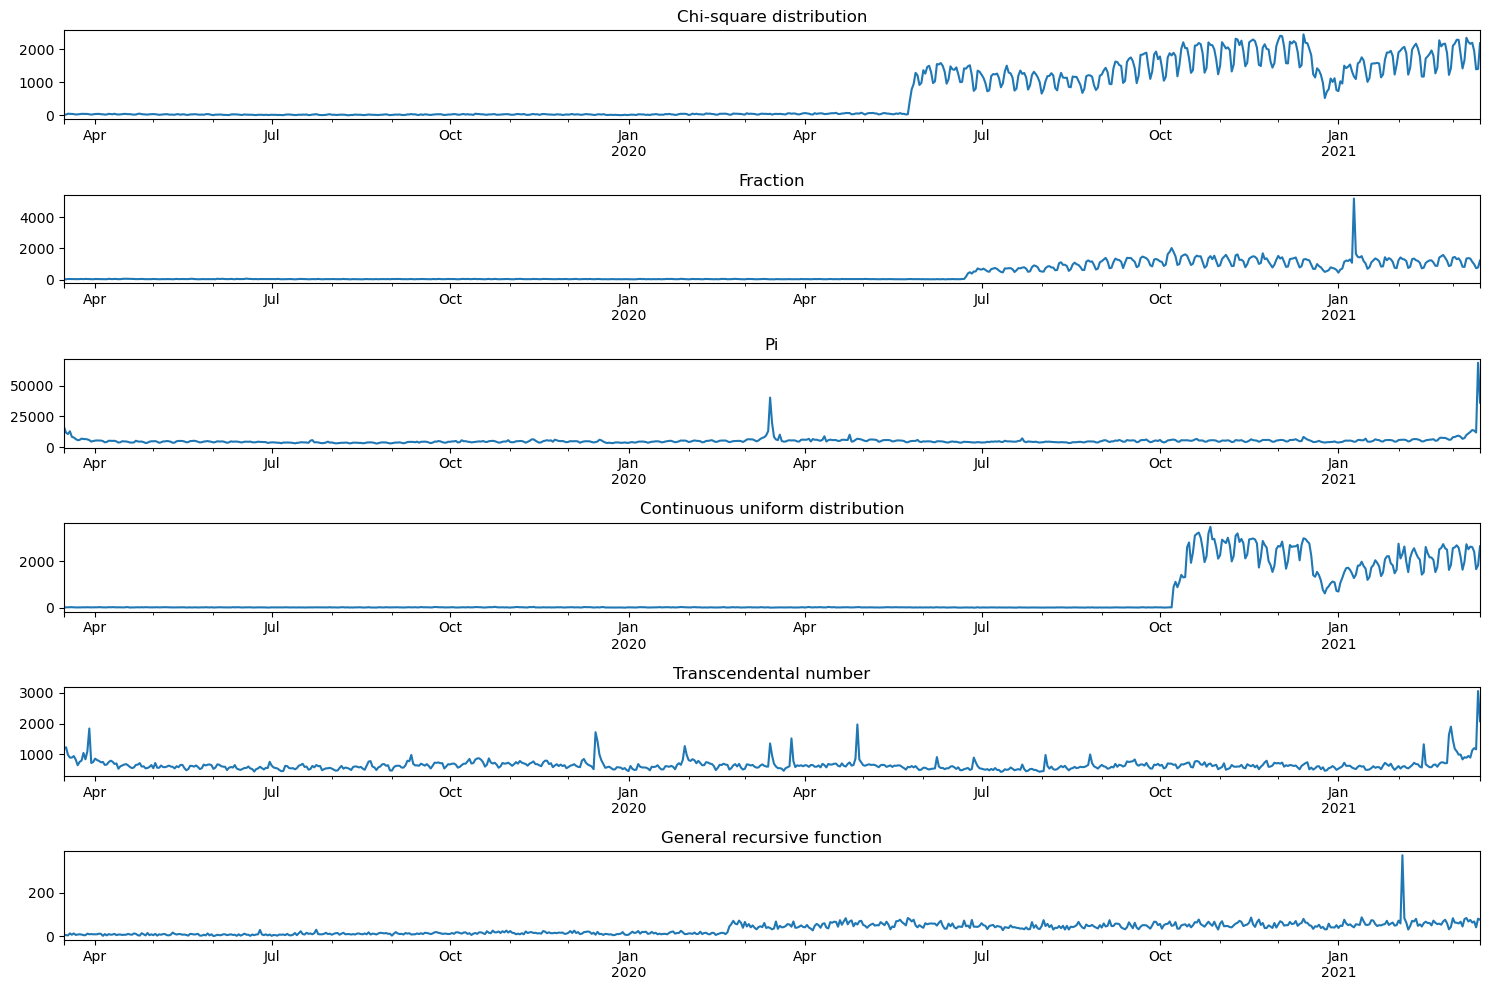

In [21]:
non_stationary_sorted = sorted(non_stationary, key=lambda x: x[1], reverse = True)

N = 6

# Plot the N non-stationary time series with the highest p-value
fig, ax = plt.subplots(N, 1, figsize=(15, 10))
for i in range(N):
    data[non_stationary_sorted[i][0]].plot(label = non_stationary_sorted[i][0], ax=ax[i])
    ax[i].set_title(non_stationary_sorted[i][0])
    
plt.tight_layout() 
plt.show()

## Predictions

We'll try to predict the behaviour of the views of a 'Mathematics' webpage. GRU (Gated Recurrent Unit) and LSTM (Long Short-Term Memory) are advanced techniques used in time series analysis, like predicting stock prices or weather patterns. They're like smart memory cells that can remember important information from the past while filtering out less relevant details. This helps them capture complex patterns and relationships in the data, making them excellent at predicting future trends. Just as we learn from experiences to make better decisions, GRU and LSTM models "learn" from historical data to make accurate predictions about what might happen next in a time series.

We'll use a window of 7 days for predicting.

### GRU

Create the Datasetclass

In [22]:
from GRU import GRU
from torch.utils.data import Dataset
import torch

# Create a dataset class which gives for X the data_window previous values and for y the next value

class WikiVitalDataset(Dataset):
    def __init__(self, X, data_window):
        self.X = X
        self.data_window = data_window

    def __len__(self):
        return len(self.X) - self.data_window
    
    def __getitem__(self, idx):
        return self.X[idx: idx + self.data_window].reshape(7, 1), self.X[idx + self.data_window].reshape(1)

Prepare the dataset

In [23]:
window_size = 7

from sklearn.preprocessing import MinMaxScaler

### Datasets
# Mathematics
scaler_math = MinMaxScaler()
math_cat = scaler_math.fit_transform(data['Mathematics'].to_numpy().reshape(-1,1))
# Split into train and test
split_treshold = int(len(math_cat)*0.8)
math_train = math_cat[:split_treshold] # TRAIN
math_test = math_cat[split_treshold:] # TEST
# Transform to torch
math_train_torch, math_test_torch = torch.tensor(math_train).float(), torch.tensor(math_test).float()
math_dataset_train = WikiVitalDataset(math_train_torch, window_size)
math_dataset_test = WikiVitalDataset(math_test_torch, window_size)

Create the model and train it

In [24]:
input_size = 1
hidden_size = 16
num_stacked_layers = 1

# Create the GRU model implemented in GRU.py
GRU_model = GRU(input_size, hidden_size, num_stacked_layers)

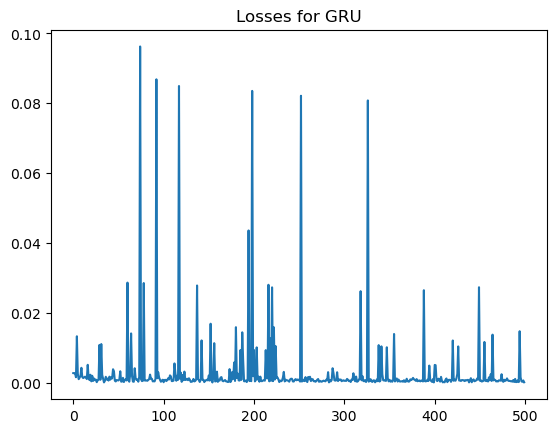

In [25]:
# Train
losses = GRU_model.train(dataset = math_dataset_train, criterion = 'mse', optimizer = 'adam', lr = 1e-3, batch_size = 10, epochs = 500, verbose = 200)

plt.plot(losses)
plt.title('Losses for GRU')
plt.show()

See the predictions on the test set

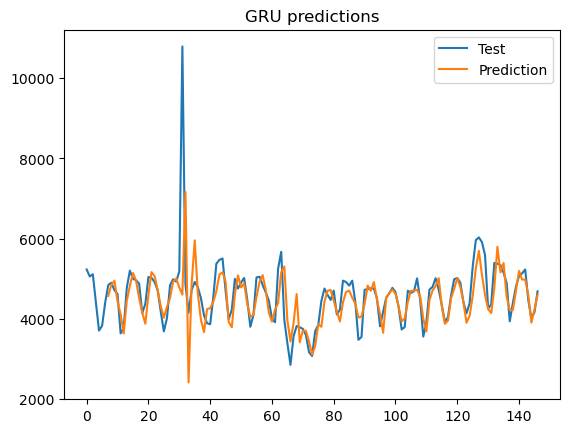

In [26]:
y_test = scaler_math.inverse_transform(np.array(math_test).reshape(-1,1))
y_pred =  scaler_math.inverse_transform(np.array([None]*window_size + GRU_model.predict(math_dataset_test)).reshape(-1,1))

# Plot the test and prediction
plt.plot(y_test, label = 'Test')
plt.plot(y_pred, label = 'Prediction')
plt.title('GRU predictions')

plt.legend()
plt.show()

### GRU hyperparameter search

Let's try different parameters.

OPTION: Train the model yourself.

HOW: Uncomment next cell

In [27]:
####### RUN THIS IF YOU WANNA TRAIN THE MODEL - APPROX 10 MINUTES #######
# params = {
#     'hidden_size': [4, 16, 32, 64],
#     'num_stacked_layers': [1, 2, 3],
# }

# # Loop over all combinations of parameters and save the best one
# min_loss = 10
# best_params = {}
# for hidden_size in params['hidden_size']:
#     for num_stacked_layers in params['num_stacked_layers']:
#         model = GRU(input_size, hidden_size, num_stacked_layers)
#         loss = model.train(dataset = math_dataset_train, criterion = 'mse', optimizer = 'adam', 
#                            lr = 1e-3, batch_size = 10, epochs = 300, verbose = 200)
#         loss = np.array(loss).mean().item()
#         if min_loss > loss:
#             min_loss = loss
#             best_params = {'hidden_size': hidden_size, 'num_stacked_layers': num_stacked_layers}


# # Plot the losses and predictions for the best model
# final_model = GRU(1, best_params['hidden_size'], best_params['num_stacked_layers'])
# final_loss = final_model.train(dataset = math_dataset_train, criterion = 'mse', optimizer = 'adam', 
#                            lr = 1e-3, batch_size = 10, epochs = 500, verbose = 200)

# # Saving parameters
# torch.save(final_model.state_dict(), 'final_model_GRU_params.pth')
# # Save the list to a file
# import pickle
# with open('final_losses_GRU.pkl', 'wb') as f:
#     pickle.dump(final_loss, f)
# # Save the best parameters
# import json
# with open('best_params_GRU.json', 'w') as f:
#     json.dump(best_params, f)


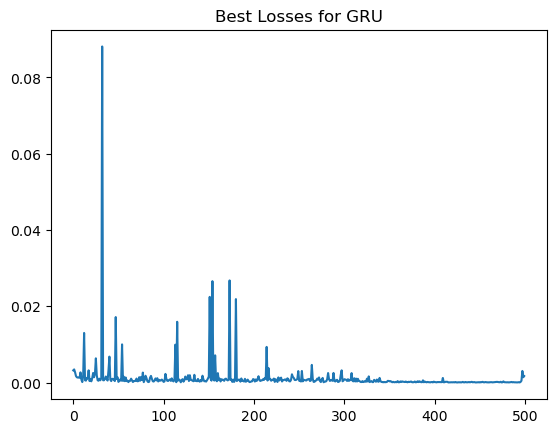

In [28]:
# Load the best parameters
import json
with open('params/best_params_GRU.json', 'r') as f:
    best_params = json.load(f)
# Load the model with best parameters
final_model = GRU(1, best_params['hidden_size'], best_params['num_stacked_layers'])
# Load the parameters
final_model.load_state_dict(torch.load('params/final_model_GRU_params.pth'))
# Load the losses
import pickle
# Load the list from the file
with open('params/final_losses_GRU.pkl', 'rb') as f:
    final_loss = pickle.load(f)

#################################################

plt.plot(final_loss)
plt.title('Best Losses for GRU')
plt.show()

Best Parameters: {'hidden_size': 64, 'num_stacked_layers': 2}


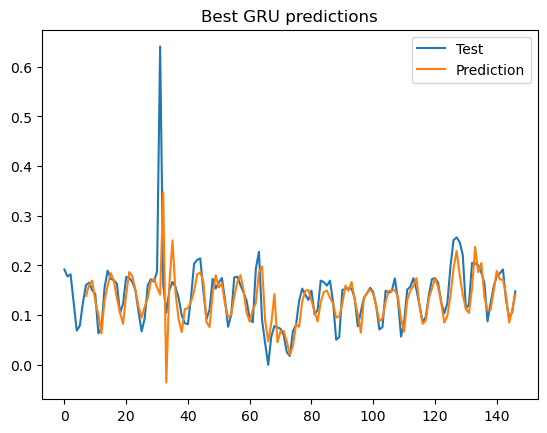

In [29]:
y_test = np.array(math_test)
y_pred =  np.array([None]*window_size + GRU_model.predict(math_dataset_test))

print('Best Parameters:', best_params)
# Plot the test and prediction
plt.plot(y_test, label = 'Test')
plt.plot(y_pred, label = 'Prediction')
plt.title('Best GRU predictions')

plt.legend()
plt.show()

### LSTM

Now we try the same with LSTM's

In [30]:
from LSTM import LSTM

input_size = 1
hidden_size = 16
num_stacked_layers = 1

# Create the GRU model implemented in GRU.py
LSTM_model = LSTM(input_size, hidden_size, num_stacked_layers)

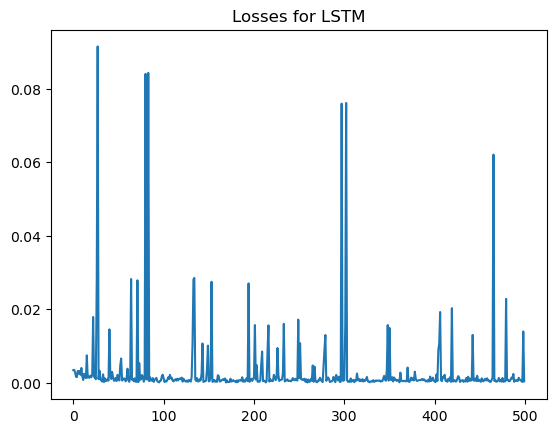

In [31]:
# Train
losses = LSTM_model.train(dataset = math_dataset_train, criterion = 'mse', optimizer = 'adam', lr = 1e-3, batch_size = 10, epochs = 500, verbose = 200)

plt.plot(losses)
plt.title('Losses for LSTM')
plt.show()

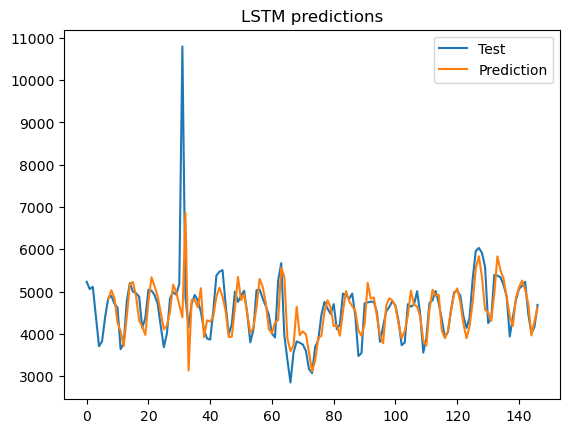

In [32]:
y_test = scaler_math.inverse_transform(np.array(math_test).reshape(-1,1))
y_pred =  scaler_math.inverse_transform(np.array([None]*window_size + LSTM_model.predict(math_dataset_test)).reshape(-1,1))

# Plot the test and prediction
plt.plot(y_test, label = 'Test')
plt.plot(y_pred, label = 'Prediction')
plt.title('LSTM predictions')

plt.legend()
plt.show()

### LSTM hyperparameter search

Again, let's perform hyperparameter search.

OPTION: Train the model yourself.

HOW: Uncomment next cell

In [33]:
####### RUN THIS IF YOU WANNA TRAIN THE MODEL - APPROX 10 MINUTES #######
# params = {
#     'hidden_size': [4, 16, 32, 64],
#     'num_stacked_layers': [1, 2, 3],
# }

# # Loop over all combinations of parameters and save the best one
# min_loss = 10
# best_params = {}
# for hidden_size in params['hidden_size']:
#     for num_stacked_layers in params['num_stacked_layers']:
#         model = LSTM(input_size, hidden_size, num_stacked_layers)
#         loss = model.train(dataset = math_dataset_train, criterion = 'mse', optimizer = 'adam', 
#                            lr = 1e-3, batch_size = 10, epochs = 300, verbose = 200)
#         loss = np.array(loss).mean().item()
#         if min_loss > loss:
#             min_loss = loss
#             best_params = {'hidden_size': hidden_size, 'num_stacked_layers': num_stacked_layers}


# # Plot the losses and predictions for the best model
# final_model = LSTM(1, best_params['hidden_size'], best_params['num_stacked_layers'])
# final_loss = final_model.train(dataset = math_dataset_train, criterion = 'mse', optimizer = 'adam', 
#                            lr = 1e-3, batch_size = 10, epochs = 500, verbose = 200)


# # Saving parameters
# torch.save(final_model.state_dict(), 'final_model_LSTM_params.pth')
# # Save the list to a file
# import pickle
# with open('final_losses_LSTM.pkl', 'wb') as f:
#     pickle.dump(final_loss, f)
# # Save the best parameters
# import json
# with open('best_params_LSTM.json', 'w') as f:
#     json.dump(best_params, f)



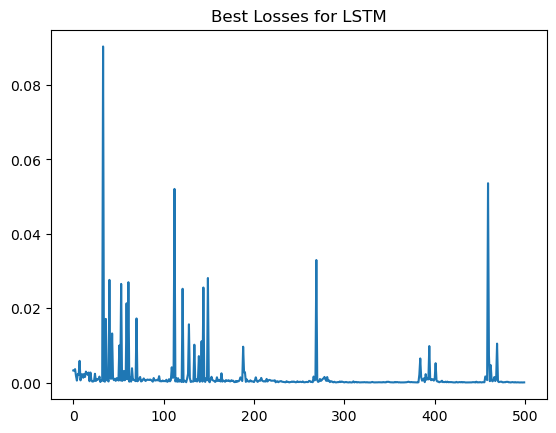

In [34]:
# Load the best parameters
import json
with open('params/best_params_LSTM.json', 'r') as f:
    best_params = json.load(f)
# Load the model with best parameters
final_model = LSTM(1, best_params['hidden_size'], best_params['num_stacked_layers'])
# Load the parameters
final_model.load_state_dict(torch.load('params/final_model_LSTM_params.pth'))
# Load the losses
import pickle
# Load the list from the file
with open('params/final_losses_LSTM.pkl', 'rb') as f:
    final_loss = pickle.load(f)

################################################

plt.plot(final_loss)
plt.title('Best Losses for LSTM')
plt.show()

Best Parameters: {'hidden_size': 64, 'num_stacked_layers': 3}


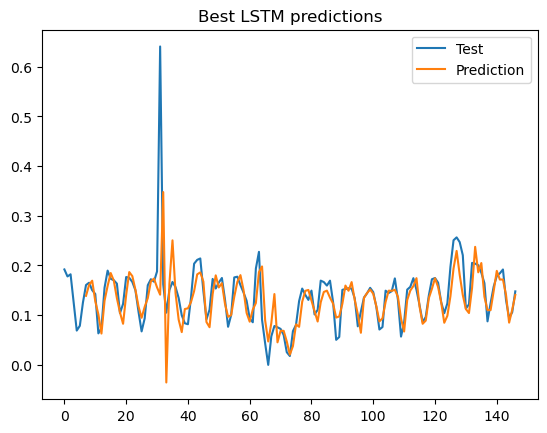

In [35]:
y_test = np.array(math_test)
y_pred = np.array([None]*window_size + GRU_model.predict(math_dataset_test))

print('Best Parameters:', best_params)
# Plot the test and prediction
plt.plot(y_test, label = 'Test')
plt.plot(y_pred, label = 'Prediction')
plt.title('Best LSTM predictions')

plt.legend()
plt.show()

### Prediction Conclusion
Ultimately, since LSTM and GRU have the approximately the same errors and predictive power for this case and take about the same training time (the search for 12 combinations took approximately 10 minutes in both). Thus, either one could be used.